In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2, 3, 4],
              [500, 700, 750, 600, 1450,
               800, 1500, 2000, 450, 1000, 500, 600],
              [1, 1, 2, 1, 2, 1, 3, 3, 1, 2, 3, 1]], dtype = np.float64)

y = np.array([0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1], dtype = np.float64)

In [3]:
#1*. Измените функцию calc_logloss так, чтобы нули по возможности не попадали в np.log. 
def calc_logloss(y, y_pred, max_delta = 1e-15 ):
    if max_delta <= 1e-15:
        max_delta = 1e-15
    if max_delta > 1e-2:
        max_delta = 1e-2
    
    it = np.nditer(y_pred, flags=['f_index'])
    for y_value in it:        
        if y_value < max_delta:
            y_pred[it.index] = max_delta
        elif 1.0 - y_value < max_delta:
            y_pred[it.index] = 1.0 - max_delta
    err = - np.mean(y * np.log(y_pred) + (1.0 - y) * np.log(1.0 - y_pred))
    return err


In [4]:
y_pred_ = np.array([0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1], dtype = np.float64)
calc_logloss(y, y_pred_, max_delta=1e-18)


20.147886096174627

In [5]:
def sigmoid(z):
    res = 1 / (1 + np.exp(-z))
    return res

In [6]:
def eval_model(X, y, iterations, alpha=1e-4, metric: callable = None):
    np.random.seed(42)
    errors = []
    W = np.random.randn(X.shape[0])
    n = X.shape[1]
    for i in range(1, iterations+1):
        z = np.dot(W, X)
        y_pred = sigmoid(z)
        err = calc_logloss(y, y_pred)
        errors.append(err)
        W -= alpha * (1/n * np.dot((y_pred - y), X.T))
    if i % (iterations / 10) == 0:
        print(i, W, err)
    return W, errors

In [7]:
W1,errors1 = eval_model(X, y, iterations=5000, alpha=1e-5)


5000 [ 0.49178485 -0.14055726 -0.00335295  1.51558833] 0.9073778125503601


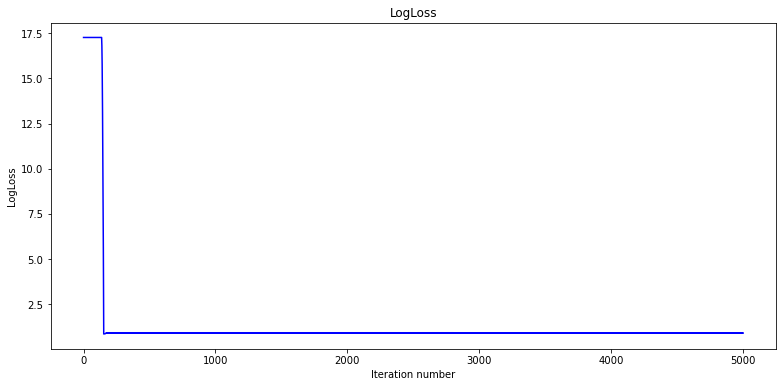

In [8]:
plt.figure(figsize=(13, 6))
plt.title('LogLoss')
plt.xlabel('Iteration number')
plt.ylabel('LogLoss')
plt.plot(errors1, c = 'b')
#plt.scatter( np.arange(0, len(errors2)) , errors2, c = 'r')

In [9]:
errors1[np.argmin(errors1)]


0.8514885361533118

In [10]:
W2,errors2 = eval_model(X, y, iterations=1000, alpha=1e-4)

1000 [ 0.49094837 -0.14766608 -0.00762026  1.51486981] 12.903476609747145


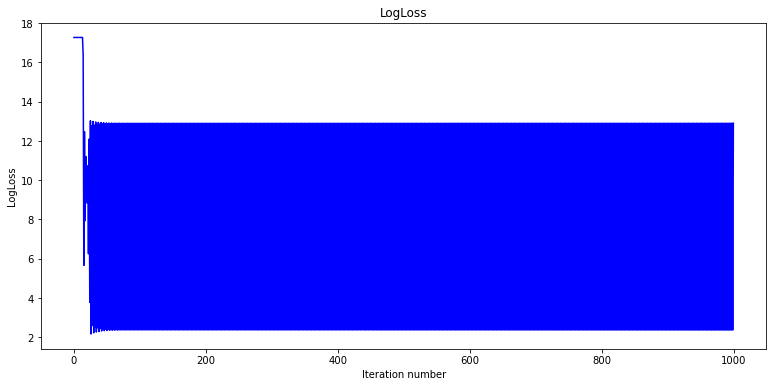

In [11]:
plt.figure(figsize=(13, 6))
plt.title('LogLoss')
plt.xlabel('Iteration number')
plt.ylabel('LogLoss')
plt.plot(errors2, c = 'b')

In [12]:
errors2[np.argmin(errors2)]

2.1696171695924966

In [13]:
W3,errors3 = eval_model(X, y, iterations=1000, alpha=0.5*1e-5)

1000 [ 0.49562372 -0.1402197  -0.00250037  1.52128484] 0.8492738862601619


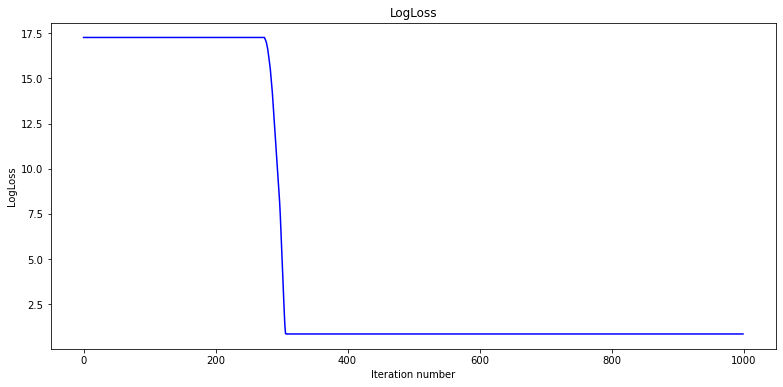

In [14]:
plt.figure(figsize=(13, 6))
plt.title('LogLoss')
plt.xlabel('Iteration number')
plt.ylabel('LogLoss')
plt.plot(errors3, c = 'b')

In [15]:
errors3[np.argmin(errors3)]

0.8492738862601619

In [16]:
W4,errors4 = eval_model(X, y, iterations=500, alpha=0.35*1e-5)

500 [ 0.49592887 -0.140299   -0.00250114  1.52172518] 0.8493640901241039


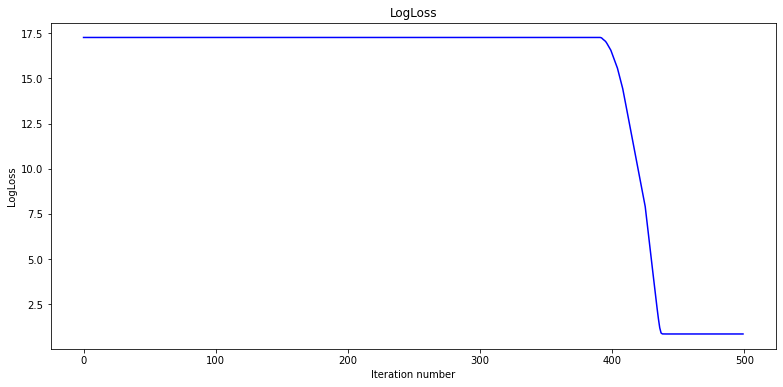

In [17]:
plt.figure(figsize=(13, 6))
plt.title('LogLoss')
plt.xlabel('Iteration number')
plt.ylabel('LogLoss')
plt.plot(errors4, c = 'b')

In [18]:
errors4[np.argmin(errors4)]

0.8493640901241039

In [19]:
W5,errors5 = eval_model(X, y, iterations=1000, alpha=0.25*1e-5)

1000 [ 0.49585847 -0.1402807  -0.00250096  1.52162355] 0.8493432355996582


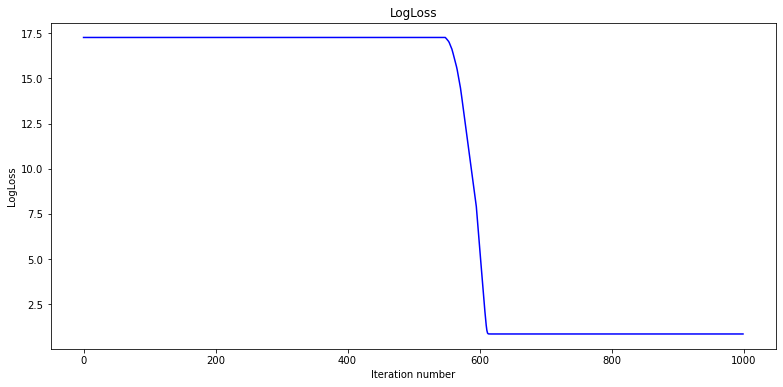

In [20]:
plt.figure(figsize=(13, 6))
plt.title('LogLoss')
plt.xlabel('Iteration number')
plt.ylabel('LogLoss')
plt.plot(errors5, c = 'b')

In [21]:
errors5[np.argmin(errors5)]

0.8493432355996582

In [22]:
W7,errors7 = eval_model(X, y, iterations=30000, alpha=1e-7)

30000 [ 0.49581158 -0.14026852 -0.00250084  1.5215558 ] 0.8493292889315739


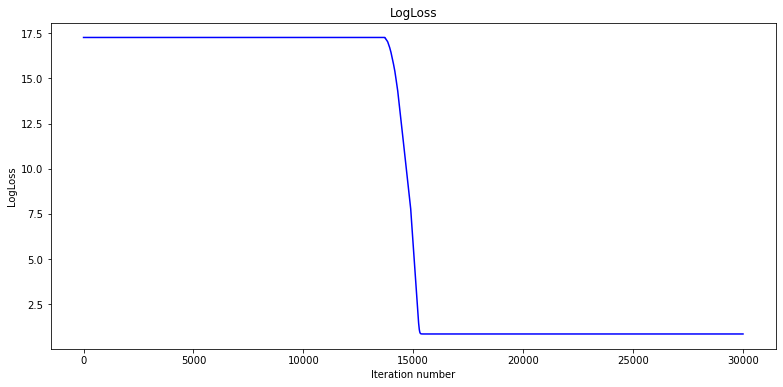

In [23]:
plt.figure(figsize=(13, 6))
plt.title('LogLoss')
plt.xlabel('Iteration number')
plt.ylabel('LogLoss')
plt.plot(errors7, c = 'b')

In [24]:
errors7[np.argmin(errors7)]

0.8493292889315739

In [25]:
#2.Подберите аргументы функции eval_model для логистической регрессии таким образом, чтобы log loss был минимальным.
W4,errors4 = eval_model(X, y, iterations=500, alpha=0.35*1e-5)

500 [ 0.49592887 -0.140299   -0.00250114  1.52172518] 0.8493640901241039


In [26]:
def calc_pred_proba(W, X):
    y_pred_proba = []
    for x in X:
        prop = 1 / (1 + np.exp(-np.dot(W,x)))
        y_pred_proba.append(prop)
    return y_pred_proba

In [27]:
print(X.T)
calc_pred_proba(W4,X.T)

[[1.00e+00 1.00e+00 5.00e+02 1.00e+00]
 [1.00e+00 1.00e+00 7.00e+02 1.00e+00]
 [1.00e+00 2.00e+00 7.50e+02 2.00e+00]
 [1.00e+00 1.00e+00 6.00e+02 1.00e+00]
 [1.00e+00 3.00e+00 1.45e+03 2.00e+00]
 [1.00e+00 0.00e+00 8.00e+02 1.00e+00]
 [1.00e+00 5.00e+00 1.50e+03 3.00e+00]
 [1.00e+00 1.00e+01 2.00e+03 3.00e+00]
 [1.00e+00 1.00e+00 4.50e+02 1.00e+00]
 [1.00e+00 2.00e+00 1.00e+03 2.00e+00]
 [1.00e+00 3.00e+00 5.00e+02 3.00e+00]
 [1.00e+00 4.00e+00 6.00e+02 1.00e+00]]


[0.6517604740363625,
 0.5315976359524123,
 0.7994609241790087,
 0.5930703954952723,
 0.3756234831927852,
 0.5041860280542162,
 0.6474625344065793,
 0.20682687630787525,
 0.6795802414459876,
 0.6808420681723609,
 0.9673791530812904,
 0.4889457784186934]

In [28]:
#4. Создайте функцию calc_pred, возвращающую предсказанный класс (на вход подаются W, который уже посчитан функцией eval_model и X, на выходе - массив y_pred).

In [174]:
def calc_pred(W, X, threshold = 0.5):
    m = X.shape[1]
    y_pred = np.zeros((m))
    A = sigmoid(np.dot(W.T, X))
    it = np.nditer(A, flags=['f_index'])
    for a in it:
        if a > threshold:
            y_pred[it.index] = 1
        elif a <= threshold:
            y_pred[it.index] = 0
    return y_pred

In [175]:
y_pred =calc_pred(W4,X, threshold = 0.60)
y_pred

array([1., 0., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0.])

In [176]:
y

array([0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1.])

In [177]:
#5. Посчитайте Accuracy, матрицу ошибок, точность и полноту, а также F1 score.
def accuracy(y, y_pred):
    
    sum_value = np.count_nonzero(y ==y_pred)
    return sum_value/len(y)

In [178]:
accuracy = accuracy(y, y_pred)
accuracy

0.6666666666666666

In [179]:
def error_matrix(y, y_pred):
    TP = np.count_nonzero(y*y_pred)
    FP = np.count_nonzero((1-y)*(y_pred))
    FN = np.count_nonzero((y)*(1-y_pred))
    TN = np.count_nonzero((1- y)*(1-y_pred))
    error_matrix = np.array([[TP, FP],[ FN, TN]])
    return error_matrix


In [180]:
error_matrix = error_matrix(y, y_pred)


In [181]:
error_matrix.view()

array([[4, 2],
       [2, 4]])

In [182]:
a = np.array([0,1,1,0,1])
b = np.array([0,0,1,1,1])
np.count_nonzero((a == b))


3

In [183]:
print(np.count_nonzero(a*b))
print(np.count_nonzero((1-a)*(1-b)))
print(np.count_nonzero((1-a)*(b)))
print(np.count_nonzero((a)*(1-b)))

2
1
1
1


In [184]:
def precision(error_matrix):
    TP = error_matrix[0][0]
    FP = error_matrix[0][1]
    return TP/(TP+FP)

In [185]:
precision=precision(error_matrix)
precision

0.6666666666666666

In [186]:
def recall(error_matrix):
    TP = error_matrix[0][0]
    FN = error_matrix[1][0]
    return TP/(TP+FN)

In [187]:
recall = recall(error_matrix)
recall

0.6666666666666666

In [188]:
def f(precision, recall, betta = 1):
    return (1+betta**2)*(precision*recall)/((betta**2)*(precision+recall))

In [189]:
f1 = f(precision,recall)
f1

0.6666666666666666

In [ ]:
#6. Могла ли модель переобучиться? Почему?
#Модель могла переобучиться из-за шума в исходных данных и непропорционально больших весовых коэффициентах 